In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preparation module
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#return the random guess if we had to predict if and employee will leave or not
random_guess = 1-len(df[df['Attrition']=='Yes'])/df.shape[0]
random_guess

0.8387755102040817

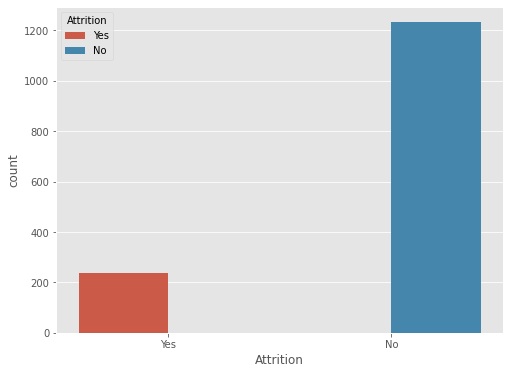

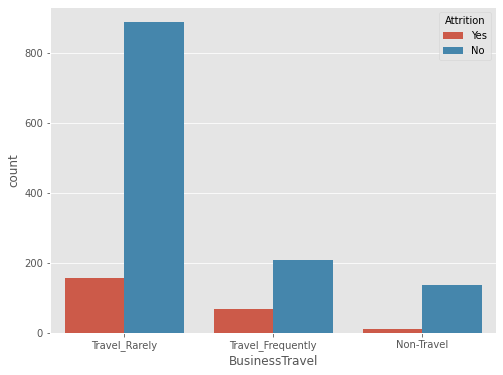

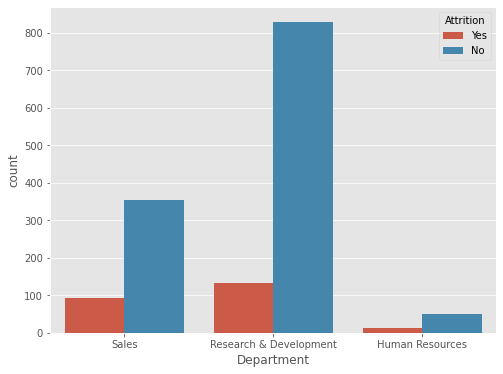

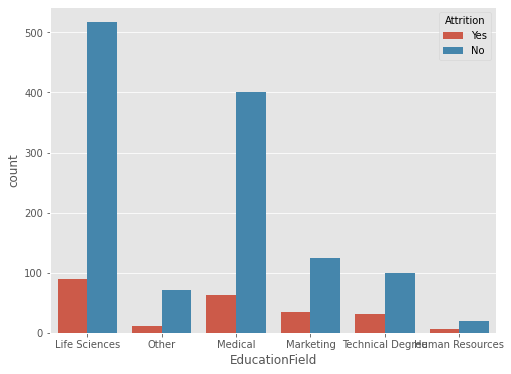

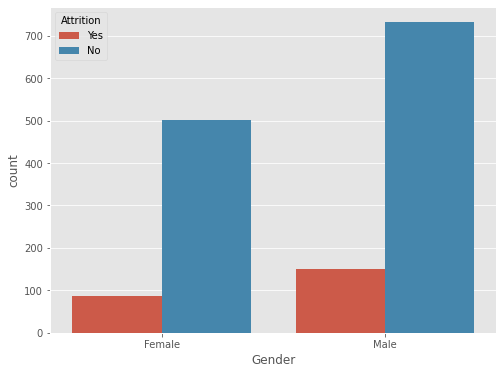

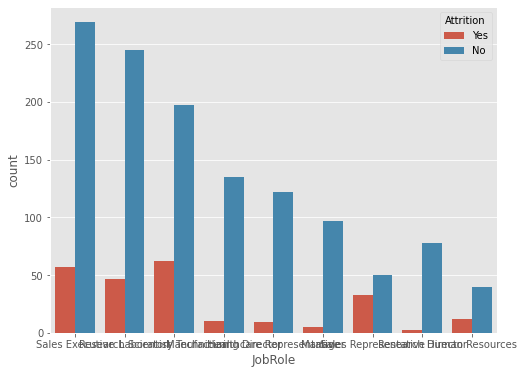

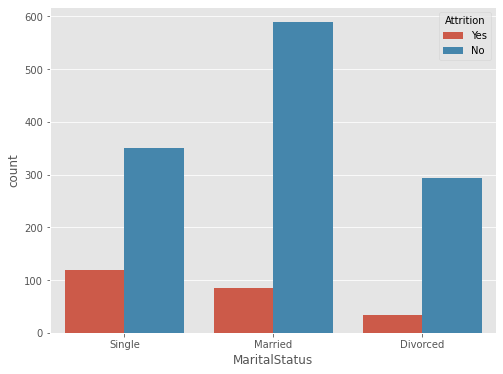

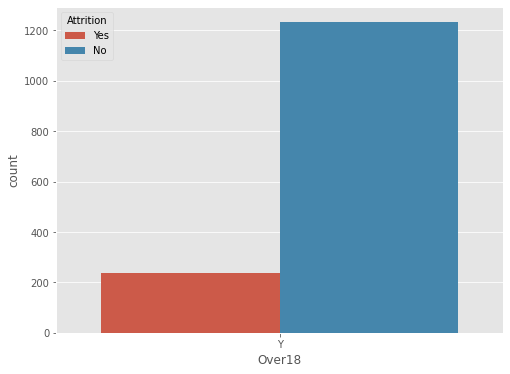

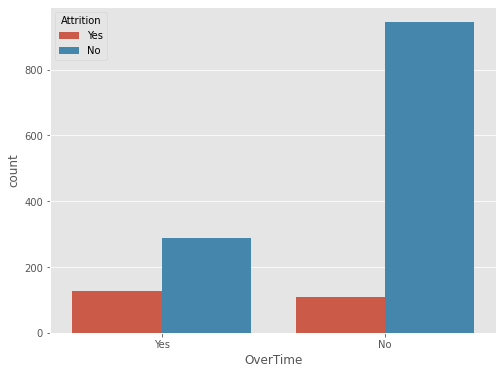

In [9]:
#plot the object features #
plt.style.use('ggplot')
#Create a loop that print all categorical variable against the attrition variable
for col in df.select_dtypes('object'):
    plt.figure(figsize=(8,6))
    sns.countplot(x=col,hue='Attrition',data=df)

In [10]:
#Drop the features with low variance
to_drop = ['StandardHours','EmployeeCount','EmployeeNumber','Over18','PerformanceRating','StockOptionLevel','JobInvolvement']
df.drop(to_drop,axis=1,inplace=True)

In [11]:
#Split X and y 
X= df.drop('Attrition',axis=1)
y=df['Attrition'].replace({'Yes':1,'No':0})

#split categorical , numerical and ordinal features
categorical = list(X.columns[X.dtypes=='object'])
ordinal = ['Education','EnvironmentSatisfaction','JobLevel','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction']
numerical = list(X.drop(categorical + ordinal,axis=1))

#Transform numerical and categorical features
X_cat = pd.get_dummies(X[categorical]) #Transform categorical into 0 and 1
X_num = StandardScaler().fit_transform(X[numerical])
X_num = pd.DataFrame(X_num,columns=X[numerical].columns) #Transform the array back to a dataframe for future use

#Create the new X object and look at it
X_new = pd.concat([X_num,X_cat],axis=1)
X_new

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-1.224807,-0.835451,-0.284329,0.523316,0.489376,0.735447,0.155707,-0.327893,-0.615492,-0.679146,-0.314873,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.175601,0.741140,1.004010,0.523316,-0.057267,-0.293077,1.707500,-0.001333,0.764998,-0.368715,0.806541,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,-1.086676,-1.605183,-0.640727,1.038693,-0.076690,-1.284418,-0.678049,1.309341,-0.678774,-2.171982,-0.164613,-0.615492,-0.679146,-0.314873,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,1.322365,0.546677,-0.887515,-0.142264,-0.236474,-0.150393,-0.277594,-0.330589,0.735447,0.155707,0.325228,0.488900,-0.679146,1.086895,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [12]:
X_train,X_test,y_train,y_test= train_test_split(X_new,y,test_size=0.40,shuffle=True)

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (882, 42)
X_test shape (588, 42)
y_train shape (882,)
y_test shape (588,)


In [13]:
# PCA to reduce the dimension and plot the graph
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>0.95)+1

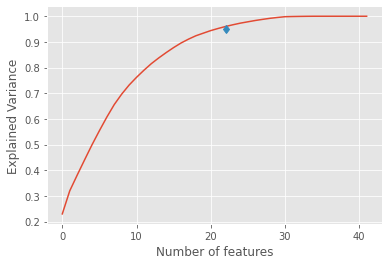

In [14]:
#Plot the variance curve against the number of features
plt.plot(cumsum)
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.plot(d,0.95,marker='d')

In [15]:
k=21
#Changing the Train set
selector = SelectKBest(f_classif,k=k)
selector.fit(X_train,y_train)

# Keep only the selected features into a new variable X_train_reduced
col=selector.get_support(indices=True)
X_train_reduced = X_train.iloc[:,col]

#Changing the Test set
selector.fit(X_test,y_test)

#Same as above
col=selector.get_support(indices=True)
X_test_reduced = X_test.iloc[:,col]

In [16]:
X_train_reduced

,Age,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
467,0.008343,0.495302,-0.293077,2.483396,0.325228,0.212802,0.806541,0,0,1,0,0,0,0,0,0,1,0,0,1,0
849,0.665354,-0.245823,-0.550208,-0.620189,-0.491174,-0.339394,-0.314873,0,0,1,0,0,0,0,0,0,0,0,1,1,0
745,1.979376,-0.025058,0.735447,0.155707,0.161947,0.764998,0.806541,1,1,0,1,0,0,0,0,0,0,1,0,0,1
27,0.555852,0.068433,-0.164511,-0.620189,0.325228,0.764998,-0.595227,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,1.322365,-0.291719,-0.164511,0.155707,0.488508,0.764998,0.806541,1,1,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,-1.853188,-0.790406,-1.193036,0.155707,-0.817734,-0.615492,-0.595227,0,0,1,0,0,0,0,0,1,0,0,1,1,0
392,1.869874,2.741627,1.635406,0.931603,-0.491174,-0.615492,-0.595227,0,1,0,0,0,0,0,1,0,0,1,0,1,0
1378,0.555852,-0.300855,0.349751,0.931603,-1.144294,-1.167687,-1.155935,0,0,1,0,0,0,0,0,0,1,0,0,0,1
850,-0.539166,-0.781057,-1.321601,0.155707,-0.981014,-1.167687,-1.155935,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [17]:
#Create fit and score the model
rfc = RandomForestClassifier(n_estimators=700,max_depth=10,n_jobs=-1,random_state=123)
rfc_model = rfc.fit(X_train_reduced,y_train)

rfc_scores = cross_val_score(rfc,X_train_reduced,y_train,scoring='accuracy',cv=5)
print('This is train score',rfc_scores.mean())

This is train score 0.8560028248587571


In [18]:
#Predict the model
y_pred_rfc = rfc_model.predict(X_test_reduced)
print('This is test score: ',accuracy_score(y_pred_rfc,y_test))

#Print the confusion_matrix
print('Confusion matrix:')
print(confusion_matrix(y_test,y_pred_rfc))

This is test score:  0.8418367346938775
Confusion matrix:
[[484   7]
 [ 86  11]]


In [19]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       491
           1       0.61      0.11      0.19        97

    accuracy                           0.84       588
   macro avg       0.73      0.55      0.55       588
weighted avg       0.81      0.84      0.79       588



In [22]:
filename = "HR_Attrition_Model.pkl"
pickle.dump(rfc_model, open(filename, 'wb'))